In [4]:
import bnlearn
import numpy as np

# Sample data points from a DAG

In [35]:
# import bayesian graph with conditional probability distribution
DAG = bnlearn.import_DAG('./data/child.bif', CPD=True)
df = bnlearn.sampling(DAG, n=10000)
df.head()

[bnlearn] >Loading bif file <./child.bif>


Generating for node: Disease:   0%|          | 0/20 [00:00<?, ?it/s]      

[bnlearn] >Checking CPDs..
[bnlearn] >Warning: CPD [Age] does not add up to 1 but is: [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[bnlearn] >Warning: CPD [ChestXray] does not add up to 1 but is: [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[bnlearn] >Warning: CPD [HypoxiaInO2] does not add up to 1 but is: [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[bnlearn] >Warning: CPD [LowerBodyO2] does not add up to 1 but is: [[1. 1. 1.]
 [1. 1. 1.]]
[bnlearn] >Warning: CPD [RUQO2] does not add up to 1 but is: [1. 1. 1.]
[bnlearn] >Warning: CPD [XrayReport] does not add up to 1 but is: [1. 1. 1. 1. 1.]
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Forward sampling for 10000 samples..


Generating for node: LVHreport: 100%|██████████| 20/20 [00:06<00:00,  3.10it/s]    


,BirthAsphyxia,Disease,Sick,Age,LungFlow,LungParench,Grunting,GruntingReport,ChestXray,XrayReport,CO2,CO2Report,CardiacMixing,HypoxiaInO2,RUQO2,DuctFlow,HypDistrib,LowerBodyO2,LVH,LVHreport
0,1,2,0,0,1,0,1,1,1,1,0,0,2,1,2,0,0,2,1,1
1,1,3,0,1,1,2,0,0,0,0,1,0,1,1,1,0,0,2,0,1
2,1,2,1,0,1,2,0,0,4,4,0,0,2,1,2,0,0,1,1,1
3,1,2,1,0,1,0,1,1,3,2,0,0,2,2,0,0,0,1,1,1
4,1,2,1,2,0,0,1,1,0,0,0,0,2,1,1,1,0,0,1,1


In [11]:
# check column values
for column in df.columns:
    print(column, set(df[column].values))

BirthAsphyxia {0, 1}
Disease {0, 1, 2, 3, 4, 5}
Sick {0, 1}
Age {0, 1, 2}
LungFlow {0, 1, 2}
LungParench {0, 1, 2}
Grunting {0, 1}
GruntingReport {0, 1}
ChestXray {0, 1, 2, 3, 4}
XrayReport {0, 1, 2, 3, 4}
CO2 {0, 1, 2}
CO2Report {0, 1}
CardiacMixing {0, 1, 2, 3}
HypoxiaInO2 {0, 1, 2}
RUQO2 {0, 1, 2}
DuctFlow {0, 1, 2}
HypDistrib {0, 1}
LowerBodyO2 {0, 1, 2}
LVH {0, 1}
LVHreport {0, 1}


In [12]:
# target label comes from GruntingReport node
y = df["GruntingReport"].values

In [23]:
# add domain label at 1 index in y
y = np.stack((y, df["Disease"].values), 1)

In [25]:
# remaining nodes form the input features
x_df = df.drop(["GruntingReport", "Disease"],axis=1) 

In [26]:
# save the x and y values in npz
np.savez('./data/child5Domains.npz', x_df.values, y)

# 3 Domains Data

In [28]:
# Creating dataset for 3 source domains
df = bnlearn.sampling(DAG, n=10000)

Generating for node: Disease:   0%|          | 0/20 [00:00<?, ?it/s]      

[bnlearn] >Forward sampling for 10000 samples..


Generating for node: LVHreport: 100%|██████████| 20/20 [00:05<00:00,  3.40it/s]    


In [29]:
df

,BirthAsphyxia,Disease,Sick,Age,LungFlow,LungParench,Grunting,GruntingReport,ChestXray,XrayReport,CO2,CO2Report,CardiacMixing,HypoxiaInO2,RUQO2,DuctFlow,HypDistrib,LowerBodyO2,LVH,LVHreport
0,1,5,0,0,2,1,0,0,3,3,2,1,1,1,2,0,0,2,1,1
1,1,3,1,1,1,2,0,0,4,4,2,1,2,2,0,0,0,1,0,0
2,1,3,1,0,1,0,1,1,0,0,0,0,2,1,0,0,0,1,0,0
3,1,3,1,0,0,0,1,1,0,0,0,0,2,1,0,0,0,1,0,0
4,0,2,1,2,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2,1,1,1,0,1,1,1,1,0,0,2,1,0,0,0,0,1,1
9996,1,2,0,0,1,0,1,1,1,3,0,0,2,2,1,0,0,0,1,1
9997,1,1,1,0,2,0,1,1,2,0,0,0,3,2,1,1,0,1,1,1
9998,1,3,1,0,1,0,1,0,1,1,1,0,2,1,1,0,0,1,0,0


In [31]:
y = df["GruntingReport"].values

In [32]:
# add domain labels
y = np.stack((y, df["CardiacMixing"].values),1)

In [33]:
x_df = df.drop(["GruntingReport", "CardiacMixing"],axis=1) 

In [34]:
np.savez('./data/child3Domains.npz', x_df.values, y)

# Create a DAG manually

In [5]:
# Define the network structure
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]

# Make the actual Bayesian DAG
DAG = bnlearn.make_DAG(edges)

[bnlearn] >Bayesian DAG created.


[bnlearn] >Plot based on BayesianModel


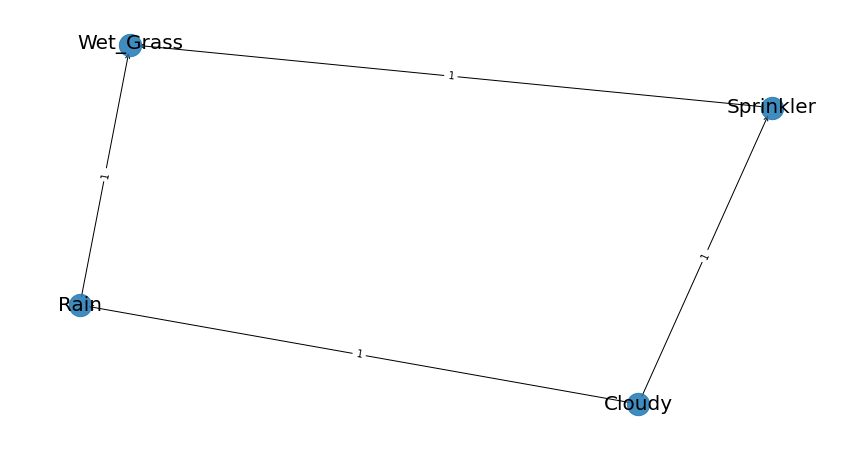

{'pos': {'Cloudy': array([ 0.54531726, -1.        ]),
  'Sprinkler': array([0.85643477, 0.57072186]),
  'Rain': array([-0.75980028, -0.47498882]),
  'Wet_Grass': array([-0.64195175,  0.90426696])},
 'G': <networkx.classes.digraph.DiGraph at 0x1347d86d8>}

In [6]:
bnlearn.plot(DAG)

# Adding Conditional Probability Distribtution (CPD) to the causal structure

In [9]:
from pgmpy.factors.discrete import TabularCPD

# Cloudy
cpt_cloudy = TabularCPD(variable='Cloudy', variable_card=2, values=[[0.5], [0.5]])
print(cpt_cloudy)

# Sprinkler
cpt_sprinkler = TabularCPD(variable='Sprinkler', variable_card=2,
                           values=[[0.5, 0.9],
                                   [0.5, 0.1]],
                           evidence=['Cloudy'], evidence_card=[2])
print(cpt_sprinkler)

# Rain
cpt_rain = TabularCPD(variable='Rain', variable_card=2,
                      values=[[0.8, 0.2],
                              [0.2, 0.8]],
                      evidence=['Cloudy'], evidence_card=[2])
print(cpt_rain)

# Wet Grass
cpt_wet_grass = TabularCPD(variable='Wet_Grass', variable_card=2,
                           values=[[1, 0.1, 0.1, 0.01],
                                   [0, 0.9, 0.9, 0.99]],
                           evidence=['Sprinkler', 'Rain'],
                           evidence_card=[2, 2])
print(cpt_wet_grass)

+-----------+-----+
| Cloudy(0) | 0.5 |
+-----------+-----+
| Cloudy(1) | 0.5 |
+-----------+-----+
+--------------+-----------+-----------+
| Cloudy       | Cloudy(0) | Cloudy(1) |
+--------------+-----------+-----------+
| Sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| Sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+
+---------+-----------+-----------+
| Cloudy  | Cloudy(0) | Cloudy(1) |
+---------+-----------+-----------+
| Rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| Rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+
+--------------+--------------+--------------+--------------+--------------+
| Sprinkler    | Sprinkler(0) | Sprinkler(0) | Sprinkler(1) | Sprinkler(1) |
+--------------+--------------+--------------+--------------+--------------+
| Rain         | Rain(0)      | Rain(1)      | Rain(0)      | Rain(1)      |
+--------------+--------------+--------------+-------

In [10]:
# connect DAG to CPD
DAG = bnlearn.make_DAG(DAG, CPD=[cpt_cloudy, cpt_sprinkler, cpt_rain, cpt_wet_grass])

[bnlearn] >No changes made to existing Bayesian DAG.
[bnlearn] >Add CPD: Cloudy
[bnlearn] >Add CPD: Sprinkler
[bnlearn] >Add CPD: Rain
[bnlearn] >Add CPD: Wet_Grass
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True


[bnlearn] >Plot based on BayesianModel


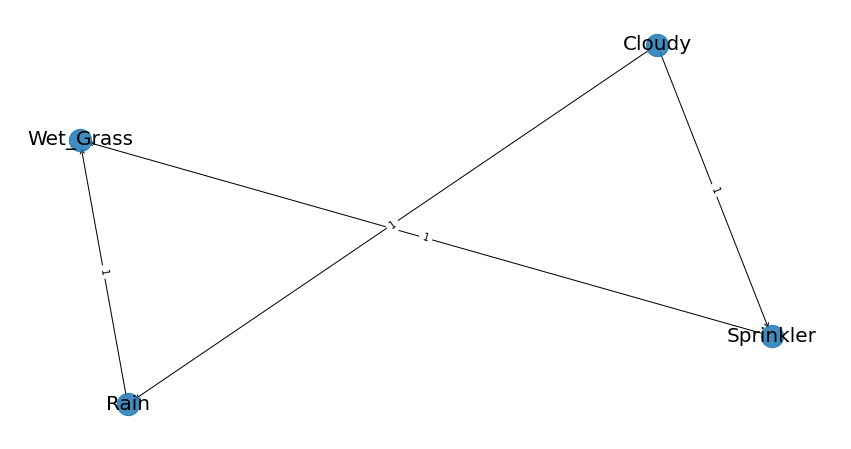

{'pos': {'Cloudy': array([0.60907946, 1.        ]),
  'Sprinkler': array([ 0.89010065, -0.56255354]),
  'Rain': array([-0.69088491, -0.92655431]),
  'Wet_Grass': array([-0.8082952 ,  0.48910786])},
 'G': <networkx.classes.digraph.DiGraph at 0x1344c05c0>}

In [12]:
bnlearn.plot(DAG)

# Inference on DAG

In [11]:
q1 = bnlearn.inference.fit(DAG, variables=['Wet_Grass'], evidence={'Rain':1, 'Sprinkler':0, 'Cloudy':1})

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

[bnlearn] >Variable Elimination..
+--------------+------------------+
| Wet_Grass    |   phi(Wet_Grass) |
+==============+==================+
| Wet_Grass(0) |           0.1000 |
+--------------+------------------+
| Wet_Grass(1) |           0.9000 |
+--------------+------------------+
